In [10]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from mdhbond import HbondAnalysis
from mdhbond import WireAnalysis
#from mdhbond import ExplicitWireAnalysis
#psf = '/net/grouphome/ag-bondar/Michail/for-Buzar-Karatanou/Michalis_test_case/read_protein_mb_9_e162u_3x.psf'
#dcd = '/net/grouphome/ag-bondar/Michail/for-Buzar-Karatanou/Michalis_test_case/chr_e162unp_n25_to_n28_PBC.dcd'

In [3]:
PDB_CODE = '6b73'
SEQ = 'B'
folder = '../'+PDB_CODE+SEQ+'/'
results_folder = folder+'results/'
plot_folder = folder+'plots/'

In [4]:
psf = results_folder+'step5_assembly.xplor_ext.psf'
dcd = results_folder+'namd/6b73_pbc4.dcd'

In [5]:
hba = HbondAnalysis('protein', psf , dcd , residuewise=False, additional_acceptors=['O'] , additional_donors=['N'])

In [6]:
hba.set_hbonds_in_selection(exclude_backbone_backbone=False)
#print(hba.current_results)
#hba.draw_graph(filename= 'chr_test_case_bonds_default2.png')

In [7]:
hba.compute_i4_bonds()

PROA-PRO-5-O:PROA-THR-9-OG1.................. | class 1 | 99.7
PROA-LEU-20-O:PROA-SER-24-OG................. | class 1 | 99.4
PROA-ASP-51-O:PROA-THR-55-OG1................ | class 1 | 54.8
PROA-ALA-52-O:PROA-THR-56-OG1................ | class 1 | 49.5
PROA-VAL-54-O:PROA-THR-57-OG1................ | class 1 | 73.5
PROA-PRO-59-O:PROA-THR-63-OG1................ | class 1 | 99.0
PROA-TYR-86-O:PROA-THR-90-OG1................ | class 1 | 6.7
PROA-ILE-92-O:PROA-THR-96-OG1................ | class 1 | 99.9
PROA-TRP-129-O:PROA-SER-133-OG............... | class 1 | 100.0
PROA-LEU-131-O:PROA-SER-134-OG............... | class 1 | 99.7
PROA-ILE-189-O:PROA-THR-193-OG1.............. | class 1 | 99.9
PROA-LEU-215-O:PROA-THR-219-OG1.............. | class 1 | 99.8
PROA-VAL-230-O:PROA-THR-234-OG1.............. | class 1 | 100.0
PROA-GLU-243-OE2:PROA-THR-248-N.............. | class 1 | 78.5
PROA-ALA-253-O:PROA-SER-257-OG............... | class 1 | 99.7
PROA-ALA-263-O:PROA-THR-267-OG1.............. | class 

({'PROA-PRO-5-O:PROA-THR-9-OG1': 1,
  'PROA-LEU-20-O:PROA-SER-24-OG': 1,
  'PROA-ASP-51-OD2:PROA-SER-91-OG': 2,
  'PROA-ASP-51-OD2:PROA-SER-269-OG': 2,
  'PROA-ASP-51-O:PROA-THR-55-OG1': 1,
  'PROA-ALA-52-O:PROA-THR-56-OG1': 1,
  'PROA-VAL-54-O:PROA-THR-57-OG1': 1,
  'PROA-PRO-59-O:PROA-THR-63-OG1': 1,
  'PROA-ASP-74-OD1:PROA-THR-145-OG1': 2,
  'PROA-ASP-74-OD2:PROA-THR-145-OG1': 2,
  'PROA-TYR-86-O:PROA-THR-90-OG1': 1,
  'PROA-ILE-92-O:PROA-THR-96-OG1': 1,
  'PROA-TRP-129-O:PROA-SER-133-OG': 1,
  'PROA-LEU-131-O:PROA-SER-134-OG': 1,
  'PROA-ILE-189-O:PROA-THR-193-OG1': 1,
  'PROA-LEU-215-O:PROA-THR-219-OG1': 1,
  'PROA-VAL-230-O:PROA-THR-234-OG1': 1,
  'PROA-GLU-243-OE1:PROA-SER-247-OG': 2,
  'PROA-GLU-243-OE2:PROA-SER-247-OG': 2,
  'PROA-GLU-243-OE2:PROA-THR-248-N': 1,
  'PROA-GLU-243-OE2:PROA-THR-248-OG1': 2,
  'PROA-ALA-253-O:PROA-SER-257-OG': 1,
  'PROA-ALA-263-O:PROA-THR-267-OG1': 1,
  'PROA-ASP-51-OD1:PROA-SER-91-OG': 2,
  'PROA-ASP-114-O:PROA-THR-117-OG1': 1,
  'PROA-ARG-203-O:

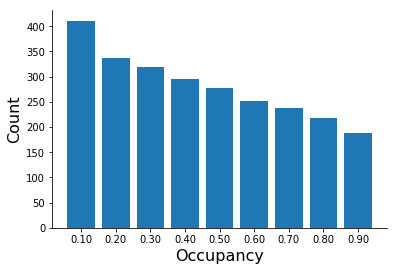

In [11]:
hba.draw_occupancy_histogram(0.1, 0.1 )

In [11]:
#hba.filter_occupancy(0.999, use_filtered=False)
#hba.draw_graph(use_filtered=False , filename= 'hba_graph.png')

In [12]:
#hba.filter_occupancy(0.999, use_filtered=False)
#graph1 = hba.draw_graph(use_filtered=False ,color_dict={'3UG9': 'blue' , 'MON2':'orange'}, filename= 'chr_test_case_bonds_color_by_segment2.png')

In [13]:
hba.filter_occupancy(0.5)
hba.draw_graph(color_dict={'6b73': 'red'}, filename='first_graph.png')

In [14]:
hba.filter_connected_component('PROA-ASP-84-N', use_filtered=False)
hba.draw_graph(filename='boby.png')

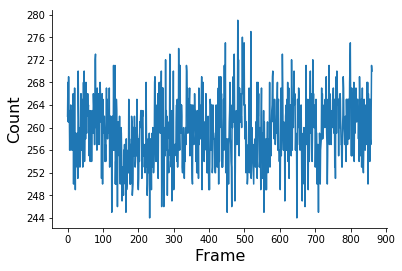

In [15]:
hba.draw_sum_of_connections_timeseries()

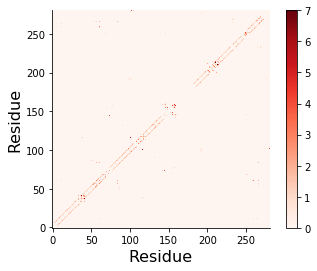

In [16]:
hba.draw_residue_residue_heatmap()

In [17]:
# hba.filter_all_paths('3UG9-LYR-248', '3UG9-GLU-81', use_filtered=False)
# hba.draw_graph(filename='all_paths_LYR_GLU81.png')
# hba.compute_combined_occupancy()
# #This function will show the path connecting root and end node

In [18]:
# hba.filter_single_path('3UG9-LYR-248' ,'3UG9-GLU-114', '3UG9-LYS-84', '3UG9-GLU-81', use_filtered=False)
# hba.draw_graph(filename='all_paths_LYR_GLU114_LYS84_GLU81.png')
# hba.compute_combined_occupancy()
# #This function will show the path connecting the nodes that you inserted expicitely.

In [ ]:
hba.set_hbonds_in_selection_and_water_around(3*3.5)

In [ ]:
hba.filter_occupancy(0.1)
hba.draw_graph(use_filtered=True)

In [ ]:
def writeToFile(data, filename):
    with open(filename , "w") as f:
        for key in data:
            f.write("{} {}\n".format(key,(data[key]),))

import numpy as _np
def average_timeseries(hbond_dict):
    return {key:_np.mean(hbond_dict[key]) for key in hbond_dict} 

In [ ]:
avg = average_timeseries(hba.filtered_results)
print(avg)
writeToFile(avg, 'chr_e162unp_bonds_3HS_04.dat')

In [ ]:
%timeit hba.filter_water_in_hydration_shells(3, use_filtered=False)

In [ ]:
res_times = hba.compute_mean_residence_time(use_filtered=False)

In [ ]:
print(res_times)

In [ ]:
hba.draw_hydration_shell_occupancy_histogram(0.1, 0.1)

In [17]:
wa = WireAnalysis('protein', psf , dcd)

In [18]:
wa.set_water_wires(max_water=5)

In [19]:
av_per_wire = wa.compute_average_water_per_wire()

In [21]:
# print(av_per_wire)

In [22]:
projection = wa.compute_wire_projection()

In [23]:
print(projection)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
def writeToFile(data, filename):
    with open(filename , "w") as f:
        for key in data:
            f.write("{} {}\n".format(key,(data[key]),))

import numpy as _np
def average_timeseries(hbond_dict):
    return {key:_np.mean(hbond_dict[key]) for key in hbond_dict}        

In [24]:
datas=wa.compute_average_water_per_wire()
# print (datas)

In [ ]:
writeToFile(datas, 'average_water_per_wire.dat')

In [25]:
wa.filter_occupancy(0.1, use_filtered=False)
wa.draw_graph(filename='chr_wires_default2.png')

In [ ]:
import numpy as _np
def average_timeseries(hbond_dict):
    return {key:_np.mean(hbond_dict[key]) for key in hbond_dict}

avg = average_timeseries(wa.filtered_results)
print (avg)

def writeToFile(data, filename):
    with open(filename , "w") as f:
        for key in data:
            f.write("{} {}\n".format(key,(data[key]),))
            
            
writeToFile(avg , 'chr_e162unp_wires_01.dat')      

In [ ]:
wa.compute_combined_occupancy()

In [ ]:
wa.filter_connected_component('MON2-LYR-248', use_filtered=False)
wa.draw_graph(color_dict={'3UG9' : 'blue', 'MON2' : 'orange'})

In [ ]:
wa.compute_combined_occupancy(wa.)

In [ ]:
wa.filter_all_paths('MON2-LYR-248', 'MON2-LYS-84', only_shortest=False ,use_filtered=False)
wa.draw_graph(filename='wires_all_paths__MON2_LYR_GLU88.png')
wa.compute_combined_occupancy()

In [ ]:
wa.compute_combined_occupancy()

In [ ]:
ewa = ExplicitWireAnalysis(psf, dcd, 'protein or resname LYR')

In [ ]:
ewa.set_explicit_water_wires(5)

In [ ]:
ewa.filter_occupancy(0.1, use_filtered=False)

In [ ]:
ewa.draw_graph(filename='expicit_wires_01.png')